################################################################################################################
# How ISIS Uses Twitter #
################################################################################################################

## DESCRIPTION :: Analyze how ISIS fanboys have been using Twitter since 2015 Paris Attacks

We scraped over 17,000 tweets from 100+ pro-ISIS fanboys from all over the world since the November 2015 Paris Attacks. We are working with content producers and influencers to develop effective counter-messaging measures against violent extremists at home and abroad. In order to maximize our impact, we need assistance in quickly analyzing message frames.

The dataset includes the following:

- Name
- Username
- Description
- Location
- Number of followers at the time the tweet was downloaded
- Number of statuses by the user when the tweet was downloaded
- Date and timestamp of the tweet
- The tweet itself


Based on this data, here are some useful ways of deriving insights and analysis:

- Social Network Cluster Analysis: 
- - Who are the major players in the pro-ISIS twitter network? Ideally, we would like this visualized via a cluster network with the biggest influencers scaled larger than smaller influencers.

- Keyword Analysis: 
- - Which keywords derived from the name, username, description, location, and tweets were the most commonly used by ISIS fanboys? Examples include: "baqiyah", "dabiq", "wilayat", "amaq"

- Data Categorization of Links: 
- - Which websites are pro-ISIS fanboys linking to? Categories include: Mainstream Media, Altermedia, Jihadist Websites, Image Upload, Video Upload,

- Sentiment Analysis: 
- - Which clergy do pro-ISIS fanboys quote the most and which ones do they hate the most? Search the tweets for names of prominent clergy and classify the tweet as positive, negative, or neutral and if negative, include the reasons why. Examples of clergy they like the most: "Anwar Awlaki", "Ahmad Jibril", "Ibn Taymiyyah", "Abdul Wahhab". Examples of clergy that they hate the most: "Hamza Yusuf", "Suhaib Webb", "Yaser Qadhi", "Nouman Ali Khan", "Yaqoubi".

- Timeline View: 
- - Visualize all the tweets over a timeline and identify peak moments


Further Reading: "ISIS Has a Twitter Strategy and It is Terrifying [Infographic]"

https://medium.com/fifth-tribe-stories/isis-has-a-twitter-strategy-and-it-is-terrifying-7cc059ccf51b#.m3zeluykl


## SOURCE :: KAGGLE

### https://www.kaggle.com/kzaman/how-isis-uses-twitter

## WHY I'M INTERESTED / MY DOMAIN EXPERTISE

My undergraduate degree is in Foreign Affairs, focus was the Middle East, and I took 3 semesters of Arabic.  I lost interest in actually working in politics, but I am still concerned about the power balances at play and how they can affect everyone else in the world.  There are also sillier reasons:
- I don't use twitter, so I'm curious why anyone else does
- Lots of people use twitter to make business connections or do marketing work through it, so it's not just used for ranting
- People say the Egyptian Arab Spring was facilitated by twitter; what do people share there?
- Since tweets are real-time, do any spikes happen from the news?

## WHAT I'M HOPING TO GAIN FROM THIS
- Experience with a messy data set
- Natural Language Processing experience
- Maybe there's a training-test option with this data set compared to one gathered with the twitter API calling for these usernames

> # IMPORT BASIC PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

> # IMPORT DATA

In [3]:
data = pd.read_csv('http://localhost:8888/files/DATA/isis.csv')
data.shape

(17410, 8)

### overview

In [18]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17410 entries, 0 to 17409
Data columns (total 8 columns):
name              17410 non-null object
username          17410 non-null object
description       14728 non-null object
location          11432 non-null object
followers         17410 non-null int64
numberstatuses    17410 non-null int64
time              17410 non-null object
tweets            17410 non-null object
dtypes: int64(2), object(6)
memory usage: 1.1+ MB


name                 0
username             0
description       2682
location          5978
followers            0
numberstatuses       0
time                 0
tweets               0
dtype: int64

### first look

In [5]:
data.head(20)

,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...
5,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:51,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...
6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 22:04,ENGLISH TRANSCRIPT : OH MURABIT! : http://t.co...
7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 22:06,ENGLISH TRANSLATION: 'A COLLECTION OF THE WORD...
8,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 22:17,Aslm Please share our new account after the pr...
9,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/10/2015 0:05,ENGLISH TRANSLATION: AQAP STATEMENT REGARDING ...


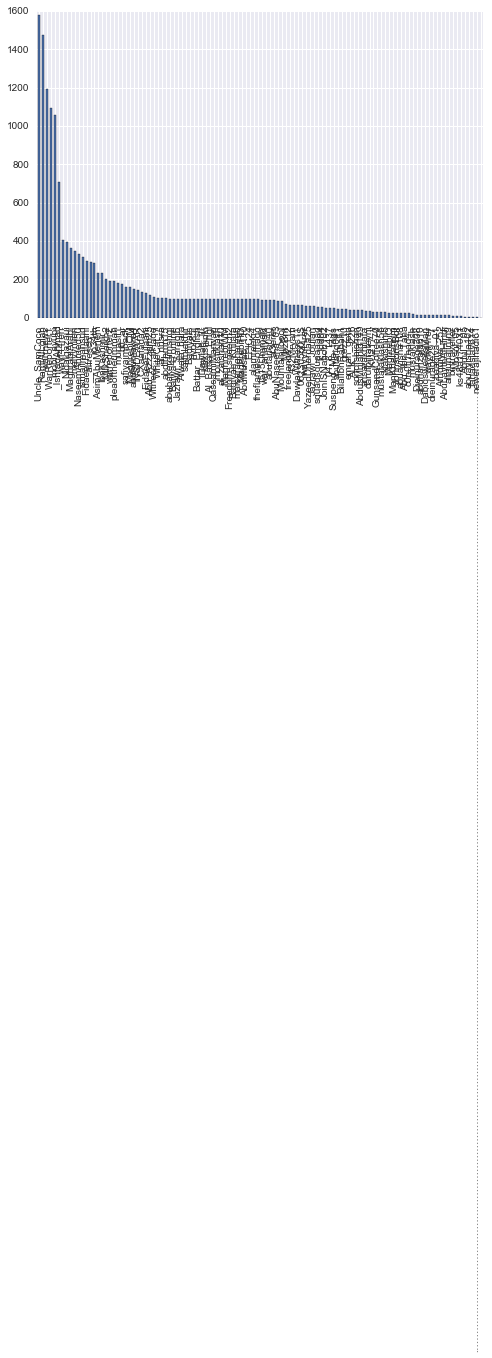

In [21]:
data.username.value_counts().plot(kind = 'bar')

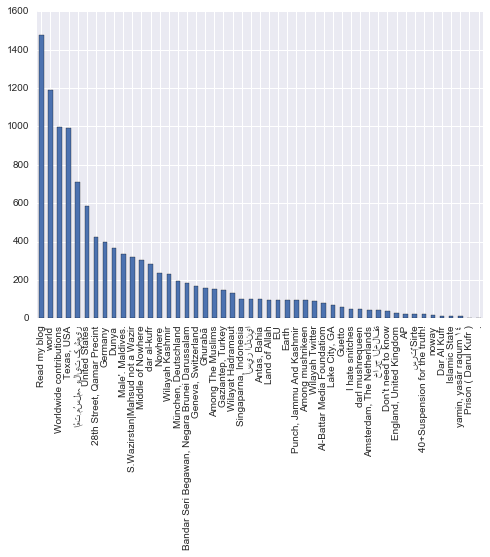

In [23]:
data['location'].value_counts().plot(kind = 'bar')

In [24]:
data['location'].value_counts()

Read my blog                                     1475
world                                            1191
Worldwide contributions                           998
Texas, USA                                        993
اُمتِ مُسلمہ ولایت کشمیر                          709
United States                                     587
28th Street, Qamar Precint                        426
Germany                                           397
Dunya                                             366
Male'. Maldives.                                  333
S.Wazirstan|Mahsud not a Wazir                    318
Middle of Nowhere                                 303
dar al-kufr                                       285
Nowhere                                           234
Wilayah Kashmir                                   231
München, Deutschland                              193
Bandar Seri Begawan, Negara Brunei Darussalam     182
Geneva, Switzerland                               166
Ghurabā                     

In [35]:
data['tweets'][data.location == '.'].value_counts()

#shaheedneverdies                                                                                                                                     1
please follow and support my account BAqiyah family\n@fahadslay614 \n@fahadslay614 \n@fahadslay614 \n@fahadslay614 \n@fahadslay614 \n@fahadslay614    1
@Kuffar_hunter follow me bk akhi                                                                                                                      1
please follow and support my account\n@fahadslay614 \n@fahadslay614 \n@fahadslay614 \n@fahadslay614                                                   1
Name: tweets, dtype: int64

In [ ]:
data['r'][data.username == 'Uncle_SamCoco'].value_counts()

# NOTES

### location has lots of NaN that could be 'hidden'
### location has some states, some countries, some cities maybe, some just strings
### tweets have
- ENGLISH TRANSLATION:
- ENGLISH TRANSCRIPT :
- ENGLISH TRANSLATION- 
- some @handle that might be able to be related to other name/username in the file ... or not
- maybe a keyword finder, looks like a lot of sheikh abu hassan...and various spellings of the same

### data[['username', 'location', 'followers', 'numberstatuses']]
- these are fairly constant, maybe can be collapsed
- - graph over time for users, or write a fxn to see changes & note times
- but they can be related to the number of statuses that are included in this data set
- followers in this data set
- any location changes within this data set

### names have
- some non-english, some icons, some arabic 
- - maybe can get arabic to english translation through google

### probably group by 
- username
- location? 
- # of followers (small, med, large)
- # of tweet-at in this data set


## Potential ideas

- timing? what happened in the news during these times? anything around that UTC time?
- sentiment?

### CLASSIFY based on 
- translation or not
- tweeted at someone or not
- - and are they in this file or not



### GOAL :: Recommend staffing for each type of emergency (fire, ems, trauma, ALS) 
- consider using twitter api to research new tweets based on findings here

### basic cleaning

In [11]:
# data.columns = [each.replace('-','_').lower() for each in data.columns]
# data = data.rename(columns = {'a1cresult' : 'a1c', 'diabetesmed' : 'diabetes_med' })